<a href="https://colab.research.google.com/github/samiHEL/ML_Intro_Regression/blob/main/ML_Intro_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connexion drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Exemple prévision salariale
import numpy as np
X=np.array([0,3,6,8])
Y=np.array([35,45,65,80])

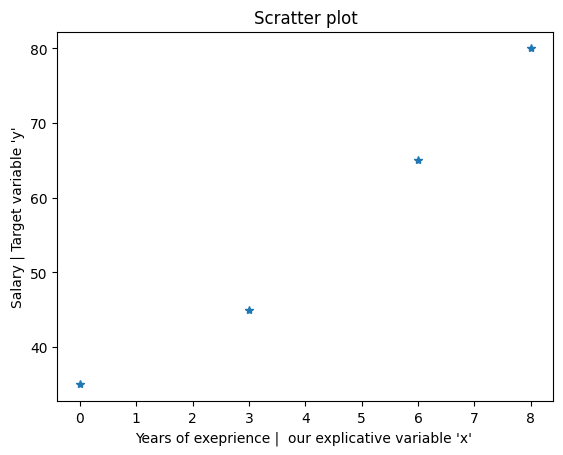

In [5]:
import matplotlib.pyplot as plt
plt.plot(X,Y,'*')
plt.xlabel("Years of exeprience |  our explicative variable 'x' ")
plt.ylabel("Salary | Target variable 'y'")
plt.title("Scratter plot")
plt.savefig("./intuitive_scatter.png")

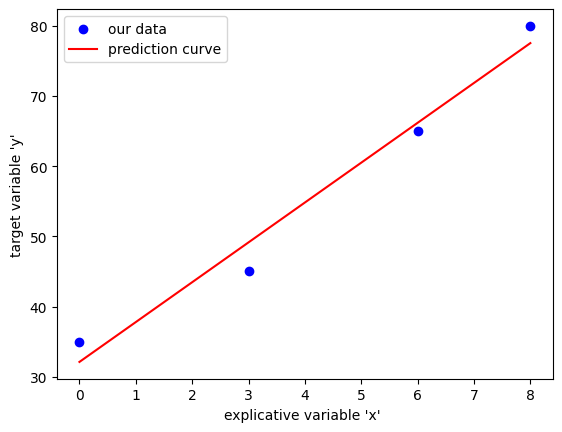

In [6]:
# Creation date de prediction
def reg_plot(x,y,m):
    plt.scatter(x,y,c='blue',label="our data")
    plt.plot(x, m.predict(x.reshape(-1, 1)), color='red',label="prediction curve")
    plt.xlabel("explicative variable 'x' ")
    plt.ylabel("target variable 'y'")
    plt.legend()
    return None


from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X.reshape(-1, 1),Y)
reg_plot(X,Y,linear_model)
plt.savefig("./approche_intuitive.png")



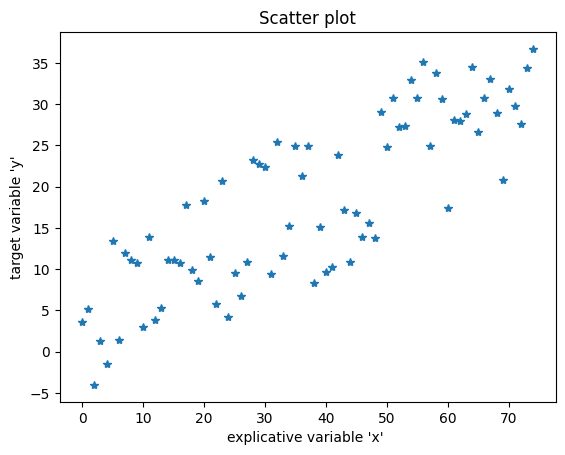

In [7]:
#Autre exemple avec  numpy en utilisant arange() et random.uniform()
import numpy as np
x=np.arange(75)
delta = np.random.uniform(-10,10, size=(75,))
y = 0.4 * x +3 + delta


plt.plot(x,y,"*")
plt.xlabel("explicative variable 'x' ")
plt.ylabel("target variable 'y'")
plt.title("Scatter plot")
plt.savefig("./intuitive_scatter_bis.png")



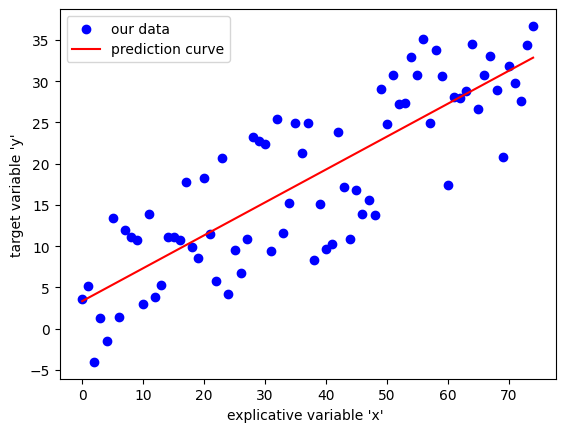

In [8]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#we are using the reshape function to convert the 1D array to a 2D array which is an obligation in scikit-learn LinearRegression() cf official doc
linear_model.fit(x.reshape(-1, 1),y)
reg_plot(x,y,linear_model)
plt.savefig("./prediction.png")




In [9]:
import pandas as pd
#df = pd.read_csv("../data/Salary_Data.csv", sep=',')
df = pd.read_csv(r'/content/drive/MyDrive/Salary_Data.csv', sep=",")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Text(0.5, 1.0, 'Years of experience vs Salary')

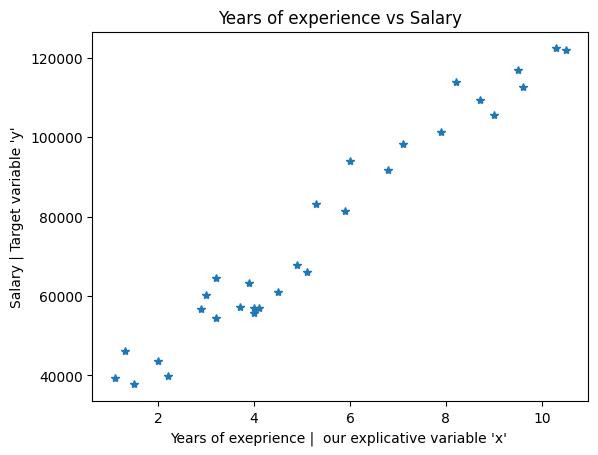

In [10]:
df=df[["YearsExperience","Salary"]]
X=df.YearsExperience
Y=df.Salary
plt.plot(X,Y,'*')
plt.xlabel("Years of exeprience |  our explicative variable 'x' ")
plt.ylabel("Salary | Target variable 'y'")
plt.title("Years of experience vs Salary")


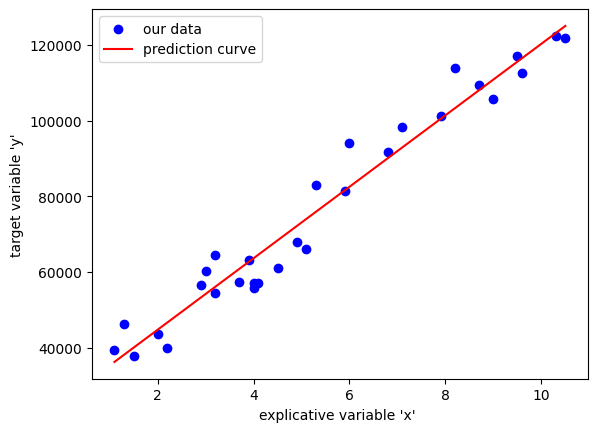

In [11]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(np.array(X).reshape(-1, 1),np.array(Y))
reg_plot(np.array(X),np.array(Y),linear_model)


**Regression Multiple**

In [12]:
#importer vos librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model #modèle linéaire
from sklearn.metrics import mean_squared_error, r2_score #métriques d'évaluation
# Info prix pour chambre -> id -> price_availability.csv
# Info general chambre -> id - > listings_final.csv
prices = pd.read_csv(r'/content/drive/MyDrive/price_availability.csv', sep=";")
listings = pd.read_csv(r'/content/drive/MyDrive/listings_final.csv', sep=";")
#attention l'individu 589 n'a pas de prix !!
listings = listings.drop(589)



listings.head()
#prices.head()

,Unnamed: 0,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1,1,1,2.0,False,True,True,False,False,1.00,1.00
1,1,661961,studio PARIS PLACE EDITH PIAF 75020,entire_home,Paris,NaN,48.867284,2.403255,2,1,1,1.0,False,False,True,True,False,0.88,0.69
2,2,1261705,chambre privée à louer @ paris oberkampf,private_room,Paris,NaN,48.867894,2.375897,1,1,1,1.0,False,False,True,True,False,1.00,1.00
3,3,1318834,Appartement au coeur du Marais,entire_home,Paris,République,48.870370,2.358510,3,2,2,1.0,False,False,True,False,False,0.82,0.48
4,4,1677091,Lovely & Quiet flat,entire_home,Paris,Buttes-Chaumont - Belleville,48.874149,2.373700,2,1,1,1.0,False,False,True,True,False,0.95,0.90


***Liaison des deux Datasets par rapport à listing_id***

In [13]:
#define our input variable X and output variable Y
X = listings.loc[:, ["listing_id", "person_capacity", "bedrooms", "bathrooms" ]]
#print(X)
Y = []

#build the price vector
for i, row in X.iterrows():
    y = 0
    #Liaison id des deux datasets
    ID = int(row["listing_id"])
    subset = prices[prices["listing_id"] == ID]
    y = subset["local_price"].mean()
    #print(y)
    Y.append(y)

#convert into numpy array
Y = np.asarray(Y)
print(Y[:20])



[ 45.94845361  44.47368421  49.         165.          69.77443609
  80.56363636  61.10909091 213.32460733 174.02849741 169.
 183.0848329  297.76315789 170.          49.95275591  71.13740458
 160.         409.54887218  35.06887755  62.13533835 107.37402597]


In [14]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((699, 4), (699,), (300, 4), (300,))

***Methode d'entrainement***

In [15]:

#entraîner le modèle de régression linéaire.
#X_train.values représente les caractéristiques (ou variables indépendantes) de l'ensemble d'entraînement
#y_train représente la variable cible (ou variable dépendante).
regr = linear_model.LinearRegression()
regr.fit(X_train.values, y_train)


#what do you think about the results ?
print('Coefficients beta_j : \n', regr.coef_)
print('Coefficients INTERCEPT beta_0 : \n', regr.intercept_)
#Coefficient négatif donc relation négative entre X_train et y_train.Lorsque X_train augmente y_train diminue, influe negativement
#donnée negative -> y -> prix - > impossible

Coefficients beta_j : 
 [2.47834609e-06 3.23451085e+01 1.43887639e+01 7.75318453e+01]
Coefficients INTERCEPT beta_0 : 
 -79.79953133672868


In [16]:
X_test

,listing_id,person_capacity,bedrooms,bathrooms
453,14992207,2,1,1.0
794,24564156,2,1,1.0
209,3452604,2,0,1.0
309,8243908,1,1,1.0
741,23233753,5,2,1.0
...,...,...,...,...
314,8525469,8,3,2.5
404,12976143,7,3,2.0
7,5662637,2,1,1.0
155,2158913,2,0,1.0


In [17]:
y_test[:100]

array([ 79.81038961, 125.        ,  95.45333333,  29.        ,
        82.5883905 , 123.63829787, 360.        , 130.        ,
       450.        , 164.845953  ,  68.35142119, 294.18181818,
        68.08247423,  51.01595745, 170.30548303,  80.24479167,
        73.78249337, 195.        , 375.0268714 , 834.96124031,
       850.65633075,  89.        , 650.        ,  63.38219895,
        83.        , 190.        , 202.23514212,  96.6056701 ,
       108.95026178,  50.        ,  28.31937173, 195.        ,
        93.70234987, 474.14258189, 450.        , 517.0984456 ,
        83.37730871, 395.        ,  79.        , 129.17493473,
       135.11227154,  51.52785146, 117.22572178, 260.        ,
       618.        ,  42.        , 180.        , 160.        ,
       179.67315175,  40.0025641 ,  80.984375  , 116.09947644,
       429.28645833,  76.06896552, 219.5037594 , 459.71391076,
       183.0848329 , 204.39276486, 161.5503876 , 131.        ,
        44.16569201, 156.19693095, 288.68421053, 219.08

In [18]:
#y = ax1 + bx2 + cx3 ... + error
#prix = coeficient*listing_id + coeficient*persone_capacity ...+ error
#calculer le coef directeur pour chaque facteur


#compute y_pred
Y_pred = regr.predict(X_test)
len(Y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


300

In [19]:
Y_pred

array([113.96717254, 137.68977495,  70.97927863,  64.89744358,
       245.81666527, 170.4788043 , 561.0179989 , 106.9418946 ,
       383.27653253, 233.75294378, 162.22364018, 612.08191179,
       159.32890963, 251.58804631, 118.1210298 ,  78.77744367,
       124.68010657, 194.48881109, 434.03826221, 790.83639952,
       586.83384388, 171.78524314, 221.95377062, 128.08854869,
       128.62279089, 175.3227481 , 121.6775822 , 154.48438242,
       156.15601944,  69.49655503,  92.87029058, 216.30267547,
       112.59683353, 754.37308581, 455.87067501, 287.66991756,
        67.79340934, 359.1764754 , 129.24823819, 214.40674172,
       169.73401224,  60.79931294, 209.06281997, 236.21743727,
       320.30632589, 123.62663053,  77.81376409, 198.81582295,
        78.94863791, 145.15976783, 127.84082014, 152.26503044,
       224.58908772,  69.26447379, 298.66775754, 164.39766518,
       214.32584501, 185.47409534, 218.11339591, 119.70295068,
        77.9772229 , 169.06272431, 141.63669477, 263.08

In [23]:
#afficher l'erreur des moindres carrées sur l'ensemble d'entrainement ainsi que le R2
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, Y_pred)) # -> MSE assez important....
# Coefficient de détermination R2
print('Variance score: %.2f' % r2_score(y_test, Y_pred))
# Le R2 est de 0.42, il y'a une assez grande quantité de données residuelle. Le modèle linéaire a un pouvoir explicatif qui n'est pas des plus pertinents.

# Avec le MSE
##calculez le RMSE pour des résultats plus intuitifs
np.sqrt(mean_squared_error(y_test, Y_pred))

Mean squared error: 19631.83
Variance score: 0.42


140.11362259561722

On en conclut que le Porbléme vient ici des Caracteristiques prisent dés le début. Le listing_id n'est pas pertinent à prendre.

On peut egelament rajouter que c'est le nombre de salle de bain qui influe le plus sur le prix dans ce lot de 4 caracteristiques

In [21]:
import pandas as pd
#df = pd.read_csv("../data/Salary_Data.csv", sep=',')
df = pd.read_csv(r'/content/drive/MyDrive/titanic.csv', sep=",")
df_copy=pd.read_csv(r'/content/drive/MyDrive/titanic.csv', sep=",")
df.head()
#print(df.shape)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


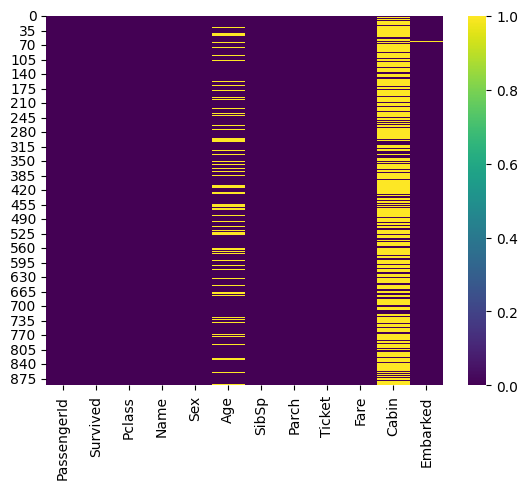

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the heatmap
#plt.heatmap(df.corr(), cmap="coolwarm")

# Create a dataset
# Default heatmap
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()
#Age et cabine influe sur la mort des personnes

In [15]:
total= len(df)
somme=df['Age'].isnull().sum()
pourcent=(somme/total)*100
print(pourcent)


19.865319865319865


pres de 20 % de données null dans la colonne "Age"

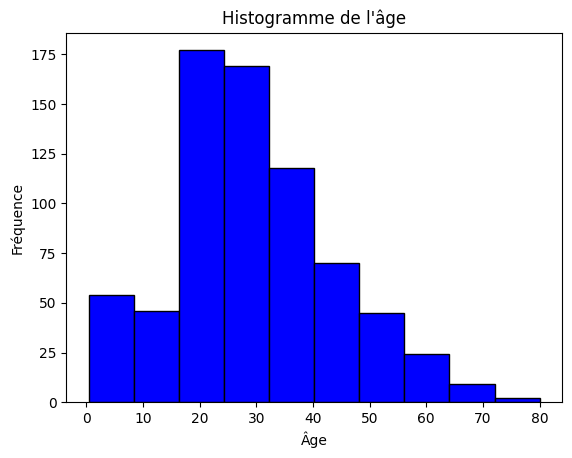

In [6]:
# Importer les données et créer le DataFrame 'df' si ce n'est pas déjà fait
# df = pd.read_csv('votre_fichier.csv')

# Créer un histogramme de la colonne 'age'
plt.hist(df['Age'], bins=10, color='blue', edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Histogramme de l\'âge')

# Afficher l'histogramme
plt.show()

In [8]:
median_age = df['Age'].median()
mean_age = df['Age'].mean()

# resultat
print(f'Median Age: {median_age}')
print(f'Mean Age: {mean_age}')

Median Age: 28.0
Mean Age: 29.69911764705882


In [9]:
total= len(df)
somme=df['Cabin'].isnull().sum()
pourcent=(somme/total)*100
print(pourcent)

77.10437710437711



Il y a 77.10% de Cabin qui manquent


In [10]:
embarked_distribution = df['Embarked'].value_counts()

# Print the distribution
print(embarked_distribution)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


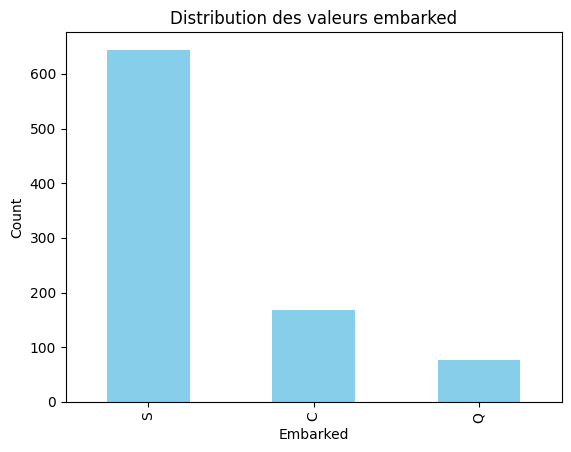

In [17]:
distribution = df['Embarked'].value_counts()

# Créer un graphique à barres
distribution.plot(kind='bar', color='skyblue')

# Ajouter des étiquettes
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Distribution des valeurs embarked')

# Afficher le graphique
plt.show()

In [19]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Replace missing values in the 'Embarked' column with 'S' (most common embarked)
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)

# Drop the 'Cabin' column since you want to ignore it
df.drop(columns=['Cabin'], inplace=True)


KeyError: ignored

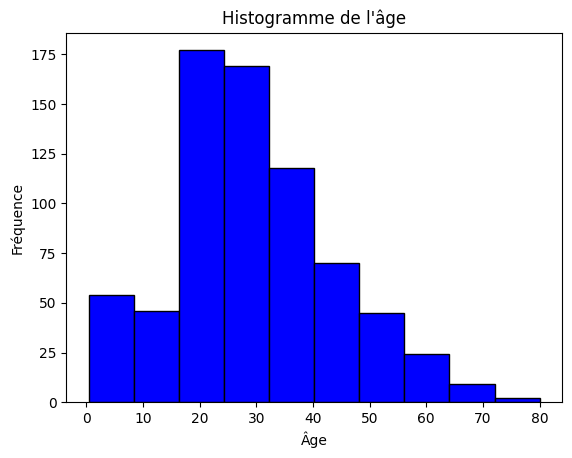

In [23]:
plt.hist(df['Age'], bins=10, color='blue', edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Histogramme de l\'âge')

# Afficher l'histogramme
plt.show()
